In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [2]:
### Step 2: Create a Dummy Dataset
# Create synthetic data
np.random.seed(42)
X = np.random.rand(100, 2)  # 1000 samples, 5 features
y = 5 * np.sum(X, axis=1) + np.random.randn(100) * 0.5  # y is a linear combination of X


In [3]:
X

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914],
       [0.61185289, 0.13949386],
       [0.29214465, 0.36636184],
       [0.45606998, 0.78517596],
       [0.19967378, 0.51423444],
       [0.59241457, 0.04645041],
       [0.60754485, 0.17052412],
       [0.06505159, 0.94888554],
       [0.96563203, 0.80839735],
       [0.30461377, 0.09767211],
       [0.68423303, 0.44015249],
       [0.12203823, 0.49517691],
       [0.03438852, 0.9093204 ],
       [0.25877998, 0.66252228],
       [0.31171108, 0.52006802],
       [0.54671028, 0.18485446],
       [0.96958463, 0.77513282],
       [0.93949894, 0.89482735],
       [0.59789998, 0.92187424],
       [0.0884925 , 0.19598286],
       [0.04522729, 0.32533033],
       [0.

In [4]:
y

array([6.28625977, 6.76938898, 1.70660204, 4.26412308, 7.4788252 ,
       5.18938819, 4.62825701, 2.15442419, 3.65765254, 4.0094131 ,
       4.33603157, 2.8821913 , 6.68791779, 3.77593157, 3.60535499,
       4.83874137, 4.94699159, 8.49327882, 1.5666722 , 5.21402246,
       3.04752487, 4.8891206 , 4.74485673, 4.57248711, 3.66432462,
       9.45035429, 9.03930304, 8.95895565, 1.7352105 , 1.42420932,
       2.76468536, 6.16869039, 4.00642157, 5.07260628, 5.54380671,
       4.8183878 , 3.68152087, 6.42189895, 4.00331752, 2.79987334,
       7.53905464, 1.34941249, 3.26741868, 7.02847694, 6.35520962,
       4.24105772, 6.63941559, 5.75232873, 4.93026292, 0.94694503,
       3.88072361, 4.64153439, 5.09545883, 5.36075779, 1.78640801,
       2.51175668, 8.946614  , 9.45068748, 5.23665593, 7.72728902,
       8.99465816, 2.46597262, 3.11758013, 8.77321136, 2.20208456,
       3.07918476, 2.04472092, 6.37150025, 7.26637719, 5.74342583,
       6.41427805, 3.18427614, 1.37267128, 6.10569208, 1.68276

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Scale the features
# z = (x - u) / s
# Standardize features by removing the mean and scaling to unit variance.


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
### Step 3: Define and Compile a Simple Overfitting ANN
# Build a simple ANN
from tensorflow.keras import regularizers

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256,kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),  # Dense Layer 1
     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,kernel_regularizer=regularizers.l2(0.01)),
     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256,kernel_regularizer=regularizers.l2(0.01)),
     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512,kernel_regularizer=regularizers.l2(0.01)),
     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024,kernel_regularizer=regularizers.l2(0.01)),
     tf.keras.layers.Dropout(0.5),# Dense Layer 2
    tf.keras.layers.Dense(1,kernel_regularizer=regularizers.l2(0.01))  # Output Layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model (without any regularization)
history = model.fit(X_train_scaled, y_train, epochs=300, validation_data=(X_test_scaled, y_test), verbose=1)


Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - loss: 44.0376 - mae: 5.0146 - val_loss: 35.6597 - val_mae: 4.6112
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 37.9212 - mae: 4.6666 - val_loss: 31.8649 - val_mae: 4.2441
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 31.1152 - mae: 3.9722 - val_loss: 27.4367 - val_mae: 3.6318
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 28.9538 - mae: 3.4849 - val_loss: 22.0890 - val_mae: 2.8347
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 26.2691 - mae: 3.0803 - val_loss: 17.3878 - val_mae: 1.9043
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 21.6623 - mae: 2.2761 - val_loss: 14.6034 - val_mae: 0.9083
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 20.2745 - mae: 1.9418 - val_loss: 13.9629 - val_mae: 0.5026
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 20.5518 - mae: 1.9344 - val_loss: 13.7835 - val_mae: 0.4854
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - los

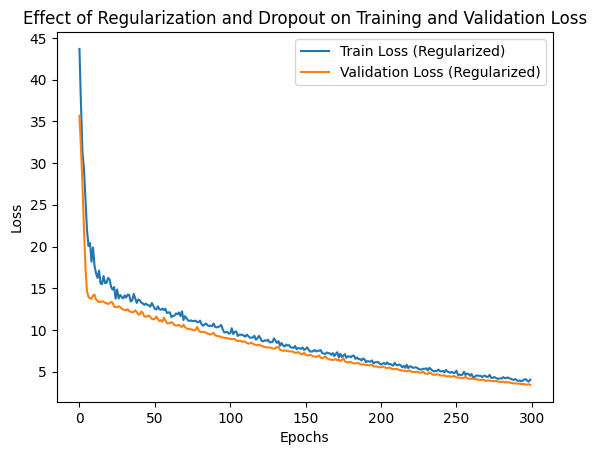

In [11]:
# Plot the loss after regularization and dropout
plt.plot(history.history['loss'], label='Train Loss (Regularized)')
plt.plot(history.history['val_loss'], label='Validation Loss (Regularized)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Effect of Regularization and Dropout on Training and Validation Loss')
plt.show()

In [ ]:
# You should observe the model's training loss decreases significantly while the validation loss starts increasing, which indicates overfitting.


In [ ]:
-----------------------------Classificaation--------------

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train Accuracy: 0.9975
Test Accuracy: 0.9950
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        92
           1       1.00      0.99      1.00       108

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


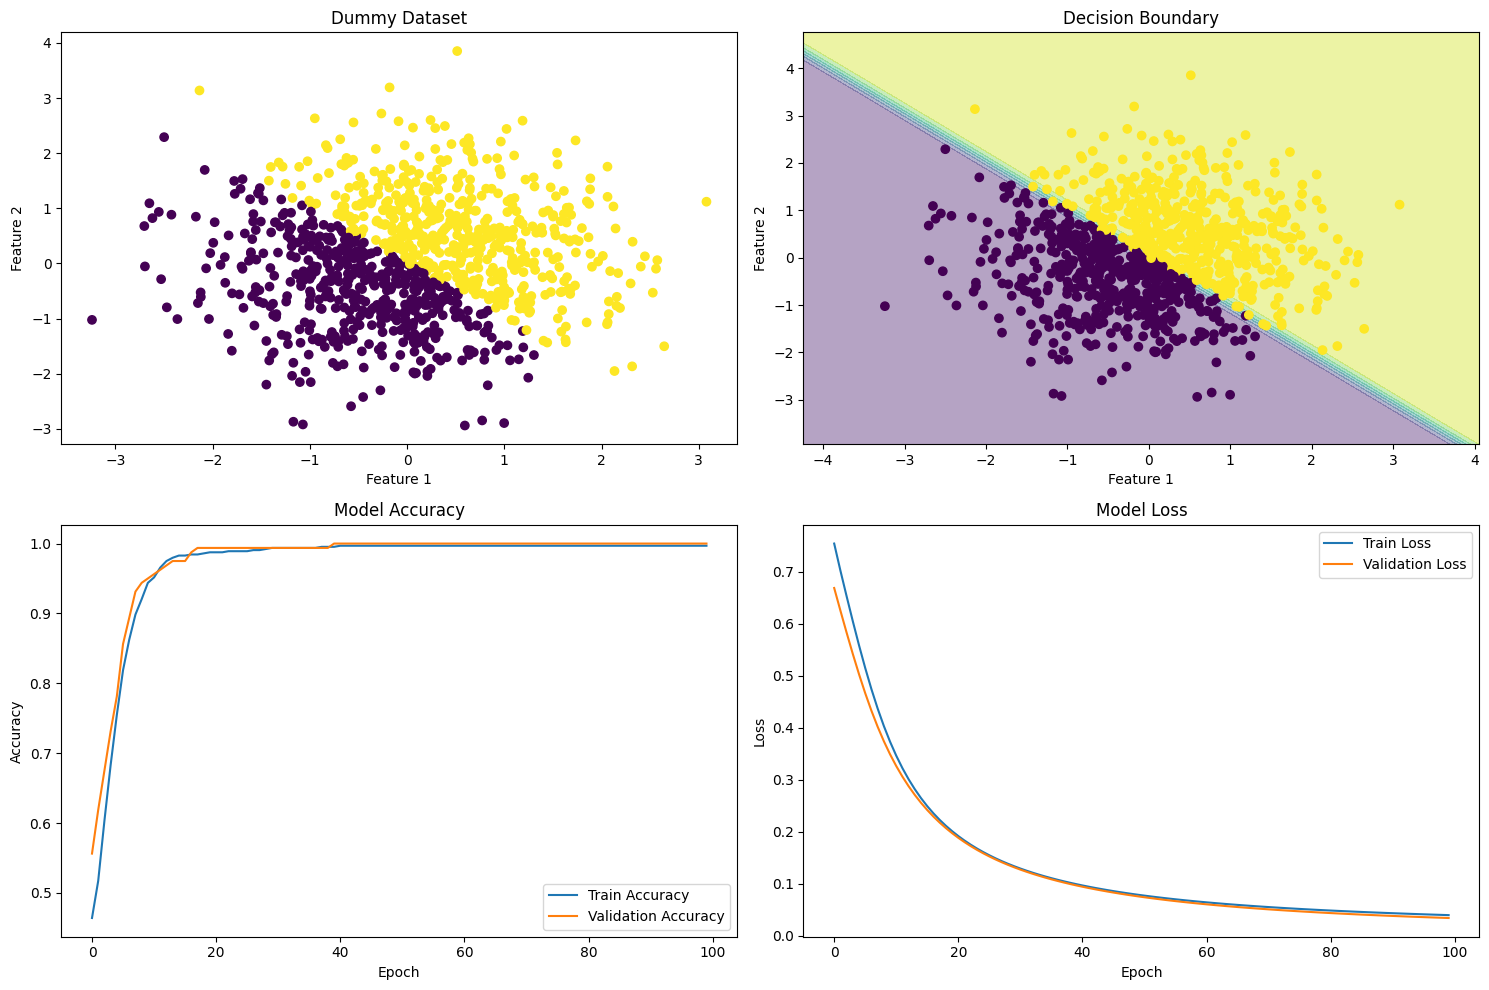

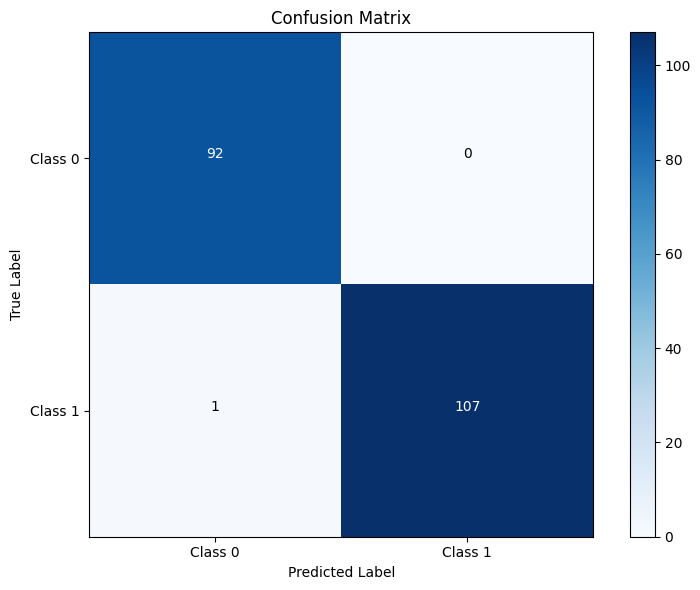

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

# Set random seed for reproducibility
np.random.seed(42)

# Create a dummy dataset
def create_dummy_dataset(n_samples=1000):
    X = np.random.randn(n_samples, 2)
    y = (X[:, 0] + X[:, 1] > 0).astype(int)
    return X, y

X, y = create_dummy_dataset()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a simple ANN model without activation functions
model = keras.Sequential([
    keras.layers.Dense(4, input_shape=(2,)),
    keras.layers.Dense(2),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer needs activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Plotting
plt.figure(figsize=(15, 10))

# Plot the dataset
plt.subplot(2, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Dummy Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the decision boundary
plt.subplot(2, 2, 2)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot training history
plt.subplot(2, 2, 3)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Class 0', 'Class 1'])
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.tight_layout()
plt.show()